In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering


In [33]:
wine = pd.read_csv('winequality-red.csv')
wine.shape

(1599, 12)

In [34]:
df = pd.read_csv('winequality-red.csv')
df.head()
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [35]:
plt.figure(figsize = (20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

In [36]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

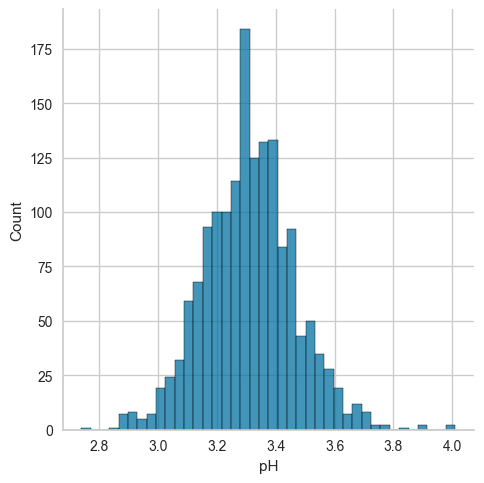

In [37]:
visual = sns.displot(df['pH'])

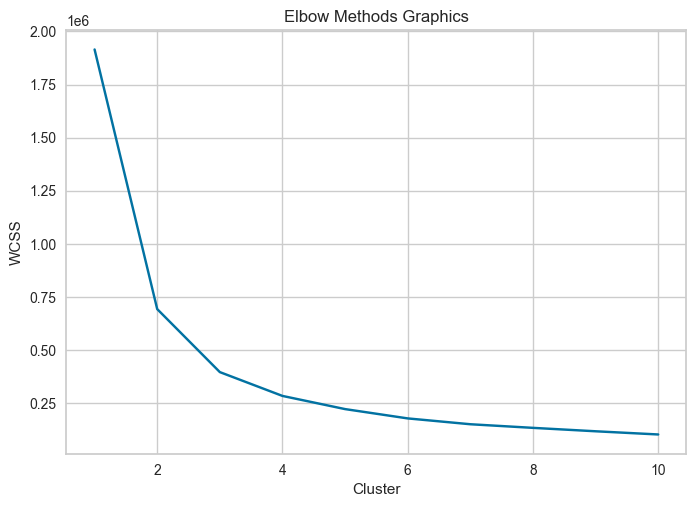

In [38]:
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', random_state= 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Methods Graphics')
plt.xlabel('Cluster')
plt.ylabel('WCSS')
plt.show()

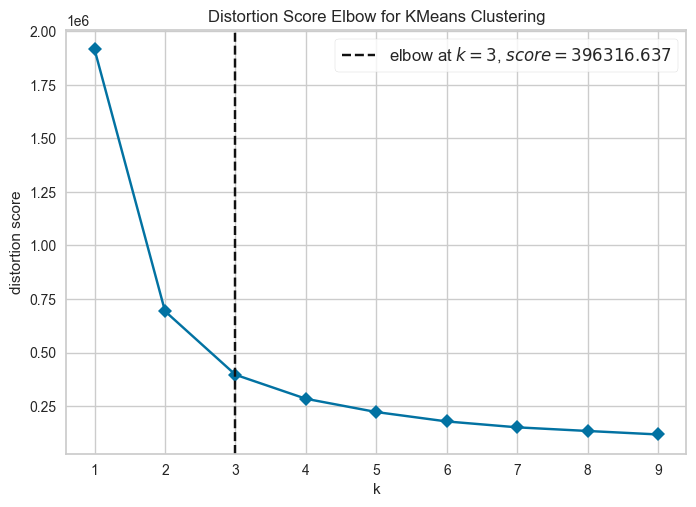

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
model = KMeans()
visible = KElbowVisualizer(model, k=(1,10), timings = False)
visible.fit(df)
visible.show()

In [40]:
from yellowbrick.cluster import KElbowVisualizer

In [41]:
bca = PCA()
X = bca.fit_transform(df)
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X)
graphics = np.unique(label)

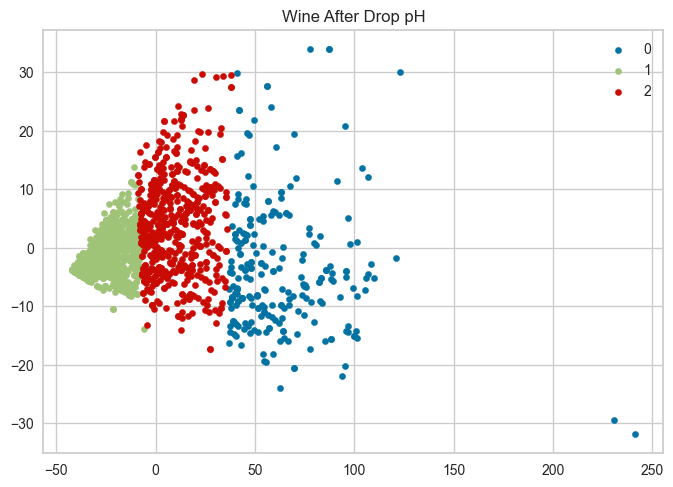

In [42]:
for i in graphics:
    plt.scatter(X[label==i,0], X[label==i,1], label=i, s=20)
    
plt.legend()
plt.title('Wine After Drop pH')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


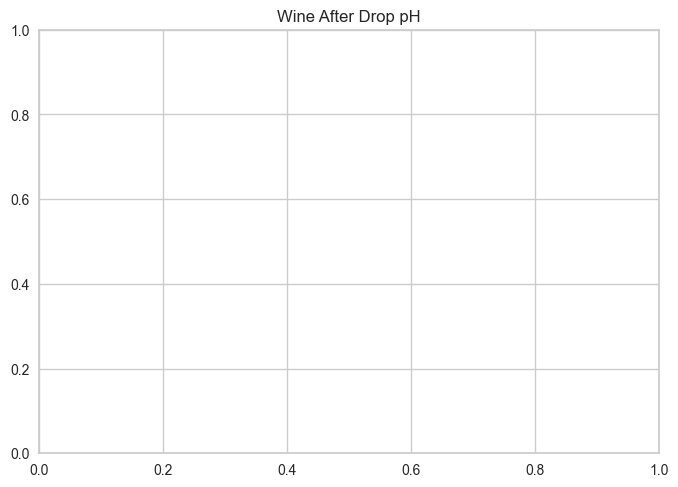

In [43]:
plt.legend()
plt.title('Wine After Drop pH')
plt.show()

In [44]:
scl= normalize(df)
scl= pd.DataFrame(scl, columns=df.columns)
scl.head()
print(scl.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.193478          0.018302     0.000000        0.049677   0.001987   
1       0.106989          0.012071     0.000000        0.035663   0.001344   
2       0.134949          0.013149     0.000692        0.039793   0.001592   
3       0.173611          0.004340     0.008681        0.029452   0.001163   
4       0.193478          0.018302     0.000000        0.049677   0.001987   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.287602              0.888952  0.026088  0.091771   0.014642   
1             0.342913              0.919006  0.013673  0.043893   0.009327   
2             0.259517              0.934261  0.017249  0.056402   0.011246   
3             0.263517              0.930059  0.015470  0.048983   0.008991   
4             0.287602              0.888952  0.026088  0.091771   0.014642   

    alcohol   quality  
0  0.245769  0.130728  
1  0.134

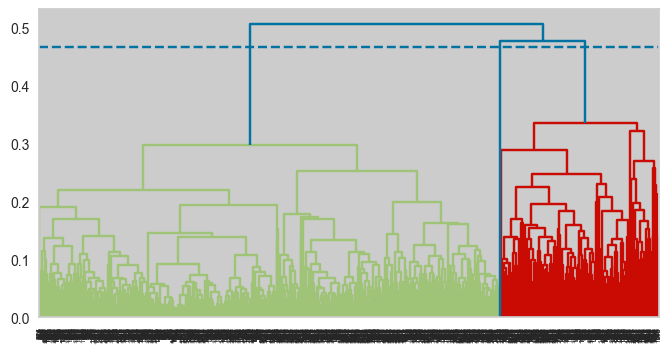

In [45]:
plt.figure(figsize= (8, 4))
Coalition = shc.dendrogram(shc.linkage(scl, method='average'))
plt.axhline(y=0.467, color='b', linestyle='--')
plt.show()

In [46]:
cl = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
cl.fit_predict(df)
print(cl.fit_predict(df))

[0 0 0 ... 0 0 0]


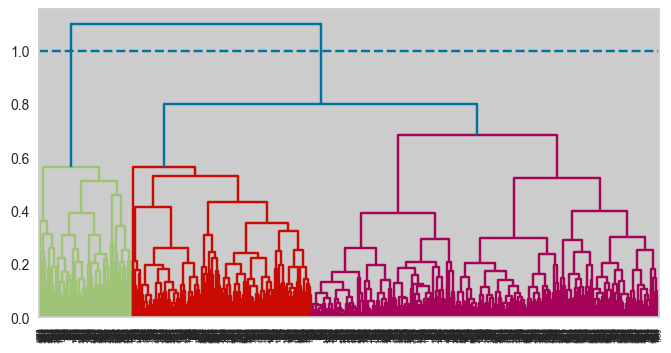

In [47]:
plt.figure(figsize= (8, 4))
Coalition = shc.dendrogram(shc.linkage(scl, method='complete'))
plt.axhline(y=1, color='b', linestyle='--')
plt.show()

In [48]:
cl = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
cl.fit_predict(df)
print(cl.fit_predict(df))

[0 0 0 ... 0 0 0]


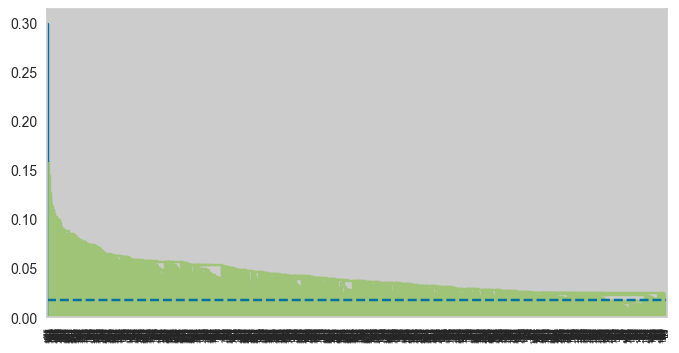

In [49]:
plt.figure(figsize= (8, 4))
Coalition = shc.dendrogram(shc.linkage(scl, method='single'))
plt.axhline(y=0.018, color='b', linestyle='--')
plt.show()

In [50]:
cl = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
cl.fit_predict(df)
print(cl.fit_predict(df))


[0 0 0 ... 0 0 0]
